# 24.07.17 머신러닝 학습 6회차: 최근접이웃(K-Nearest Neighbor)

## 01 개념

### K-Nearest Neighbor

1. **순위**를 사용하는 방법으로, 가장 가까운 K개의 이웃으로부터 정보를 예측/분류 하는 방법.

2. 회귀 모델의 경우 종속 변수의 평균값으로 예측, 분류 모델의 경우 과반수 범주로 예측.

3. 예를 들어, K=1 이라면 가장 가까운 1개의 이웃값으로 해당 데이터를 분류한다.

4. 따라서 거리 측정 방법에 따라 결괏값이 크게 달라진다. 일반적으로 유클리드거리 사용.

### 장단점

1. 가까운 이웃의 데이터만 사용하기에 이상치에 민감하지 않음.

2. 학습 데이터의 수가 많다면 효과적이다.

3. 기준과 예측 데이터 간의 거리를 모두 계산해야 해서 데이터가 많으면 시간이 걸린다.

### n_neighbors = K개

1. 최근접 이웃 수(K)를 정하는 중요한 하이퍼 파리미터가 된다.

2. 가장 최고의 K값을 찾기 위한 통계적 방법은 존재하지 않음. 반복 실험을 통해 찾아낸다.

## 02 수식에 대한 이해

### 거리 측정 방법 1. 유클리드 거리 (Euclidean Distance)

1. 유클리드 거리는 두 점 사이의 직선 거리를 계산하는 방식이다.

2. 예를 들어, 두 점 (x1, y1)과 (x2, y2) 사이의 유클리드 거리는 아래와 같다.

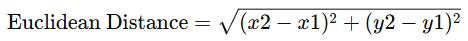
 
3. 이 방식은 우리가 일상적으로 생각하는 직선 거리를 구할 때 사용한다.

4. 쉽게 말해, **지도에서 두 지점 사이의 가장 짧은 길**을 생각하면 된다.

### 거리 측정 방법 2. 맨해튼 거리 (Manhattan Distance)

1. 맨해튼 거리는 격자형 도로를 따라 이동하는 방식으로 거리를 계산한다.

2. 두 점 (x1, y1)과 (x2, y2) 사이의 맨해튼 거리는 아래와 같다.

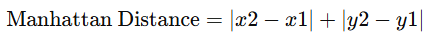

3. 이 방식은 택시가 격자형 도로를 따라 이동할 때 사용하는 거리 계산 방법과 비슷하다.

4. 이거는 마치 **도시에 있는 블록을 따라 이동**하는 것과 유사하다.

### 거리 측정 방법 3. 민코프스키 거리 (Minkowski Distance)

1. 민코프스키 거리는 유클리드 거리와 맨해튼 거리의 일반화된 형태이다.

2. p라는 매개변수에 따라 다른 거리 계산이 가능합니다.

3. 두 점 (x1, y1)과 (x2, y2) 사이의 민코프스키 거리는 다음과 같다.

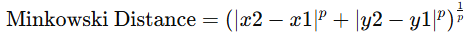

4. p=1일 때는 맨해튼 거리와 같고, p=2일 때는 유클리드 거리와 같다.

### 거리 측정 방법 4. 코사인 유사도 (Cosine Similarity)

1. 코사인 유사도는 두 벡터가 얼마나 비슷한지(유사도)를 각도로 계산한다.

2. 이 값은 0과 1 사이에 있으며, 1에 가까울수록(=각도가 작을수록) 두 벡터가 유사하다.

3. 두 벡터 A와 B의 코사인 유사도는 다음과 같다.

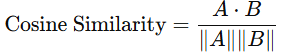

4. A*B는 두 벡터의 내적을 의미하고, ∥A∥와 ∥B∥는 각각 벡터 A와 B의 크기(노름)이다.

5. 코사인 유사도는 주로 텍스트 데이터를 비교할 때 많이 사용한다.

### 코사인 유사도 쉽게 이해하기

1. 코사인 유사도는 두 개의 벡터(화살표)가 얼마나 비슷한지를 나타내는 방법이다.

2. 벡터는 길이와 방향을 가진 화살표 같은 것으로 이해할 수 있다.

3. 화살표들 사이의 각도가 작을수록 두 화살표는 더 비슷하다고 말할 수 있다.

4. 예를 들어,
    - 만약 두 화살표가 완전히 같은 방향을 가리키고 있다면, 그 사이의 각도는 0도이다. 이때 코사인 유사도는 1이 된다.

    - 만약 두 화살표가 직각, 즉 90도 각도로 서로를 가리키고 있다면, 그들은 전혀 비슷하지 않다. 이때 코사인 유사도는 0이 된다.
    
    - 만약 두 화살표가 정확히 반대 방향을 가리키고 있다면, 그 사이의 각도는 180도이다. 이때 코사인 유사도는 -1이 된다.

### 코사인 유사도 예시

1. 코사인 유사도 = 1: 두 벡터가 같은 방향을 향하고 있어 완전히 동일한 패턴을 가집니다.

2. 코사인 유사도 = 0: 두 벡터가 90도 각도로 서로 관련이 없음을 나타냅니다.

3. 코사인 유사도 = -1: 두 벡터가 정반대 방향을 향하고 있어 완전히 반대되는 패턴을 가집니다.

### 각도가 작은게 1에 가까운 이유

1. 코사인 유사도에서 1에 가까운 값은 두 벡터 사이의 각도가 작다는 것을 의미한다.

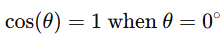

2. 즉, 벡터가 동일한 방향을 가질 때, 두 벡터 사이의 값은 0이 되고, 코사인의 값은 1이 된다.

## 03 코드 실습(1)

In [2]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
df['species'].astype('category').cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [8]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
df['species'][:3]

0    0
1    0
2    0
Name: species, dtype: int32

In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:, -1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # test_size=0.2

In [23]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [24]:
model_1 = KNeighborsClassifier(n_neighbors=5)
model_2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

In [25]:
model_1.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
model_2.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
# 방법1
pred = model_1.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
accuracy

0.9736842105263158

In [44]:
# 방법2
print('유클리드 학습 데이터 성능: ', model_1.score(X_train,y_train))
print('유클리드 평가 데이터 성능: ', model_1.score(X_test,y_test))
print('민코프스키 학습 데이터 성능: ', model_2.score(X_train,y_train))
print('민코프스키 평가 데이터 성능: ', model_2.score(X_test,y_test))

유클리드 학습 데이터 성능:  0.9732142857142857
유클리드 평가 데이터 성능:  0.9736842105263158
민코프스키 학습 데이터 성능:  0.9732142857142857
민코프스키 평가 데이터 성능:  0.9736842105263158


In [45]:
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [48]:
pd.Series(pred).value_counts().sort_index()

0    13
1    15
2    10
Name: count, dtype: int64

In [55]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=le.classes_))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## 04 코드 실습(2)

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

### 메타데이터

- CRIM : 자치시 별 1인당 범죄율

- ZN : 25,000 평방피트를 초과하는 거주지역의 비율

- INDUS : 비소매상업지역이 점유하고 있는 토지의 비율

- CHAS : 찰스강에 대한 더미변수(강의 경계에 위치하면 1)

- NOX : 10ppm 당 농축 일산화질소

- RM : 주택 1가구당 평균 방의 개수

- AGE : 1940년 이전에 건축된 소유주택의 비율

- DIS : 5개의 보스턴 직업센터까지의 접근성 지수

- RAD : 방사형 도로까지의 접근성 지수

- TAX : 10,000 달러 당 재산세율

- PTRATIO : 자치시 별 학생/교사의 비율

- B : 1000(Bk-0.63)^2, 여기서 Bk는 자치시 별 흑인의 비율

- LSTAT : 모집단의 하위계층의 비율(%)

- MEDV : 본인 소유의 주택가격(중앙값), 단위 $1,000 → 종속변수

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [58]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [59]:
X = df.drop(columns='medv')
y = df['medv']
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [61]:
y # 연속형

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [71]:
model_1 = KNeighborsRegressor(n_neighbors=5)
model_2 = KNeighborsRegressor(n_neighbors=5, metric='minkowski')

In [72]:
model_1.fit(X_train, y_train)

KNeighborsRegressor()

In [73]:
model_2.fit(X_train, y_train)

KNeighborsRegressor()

In [74]:
# 방법2 : 결정계수(R^2)
print('유클리드 학습 데이터 성능: ', model_1.score(X_train,y_train))
print('유클리드 평가 데이터 성능: ', model_1.score(X_test,y_test))
print('민코프스키 학습 데이터 성능: ', model_2.score(X_train,y_train))
print('민코프스키 평가 데이터 성능: ', model_2.score(X_test,y_test))

유클리드 학습 데이터 성능:  0.7066272660046313
유클리드 평가 데이터 성능:  0.4616380924610112
민코프스키 학습 데이터 성능:  0.7066272660046313
민코프스키 평가 데이터 성능:  0.4616380924610112


In [75]:
pred = model_1.predict(X_test)
pred

array([20.76, 29.54, 23.08, 11.94, 21.82, 21.4 , 22.96, 24.38, 30.24,
       18.26, 10.6 , 10.8 , 16.76, 10.38, 38.84, 25.34, 21.98, 23.44,
       24.32, 27.28, 23.56, 20.32, 19.02, 31.14, 21.16, 13.44, 18.48,
       22.46, 24.02, 17.4 , 16.04, 20.16, 19.68, 25.  , 24.6 , 19.04,
       10.38, 20.08, 13.44, 14.7 , 25.14, 21.16, 20.18, 19.04, 20.2 ,
       24.12, 23.26, 21.6 , 17.16, 20.04, 18.26, 22.3 , 28.14, 25.4 ,
       22.46, 22.46, 23.4 , 19.58, 10.  , 22.3 , 32.88, 20.72, 26.32,
       28.04, 22.52, 32.88, 19.04, 18.06, 13.9 , 29.34, 31.16, 21.82,
       24.72, 30.94, 22.52, 10.96, 32.1 , 22.84, 25.04, 20.46, 24.48,
       18.22, 16.38, 32.68, 28.02, 29.34, 23.8 , 12.7 , 32.24, 20.56,
       31.76, 13.44, 22.74, 25.02, 24.04, 22.62, 11.12, 25.06, 11.66,
       22.52, 29.42, 19.56, 26.5 , 28.04, 24.7 , 20.08, 12.02, 16.76,
       22.8 , 26.32, 32.24, 16.76, 18.06, 19.66, 16.86, 22.12, 10.96,
       17.86, 11.96, 41.6 , 32.88, 11.48, 28.06, 21.44, 22.1 , 19.04,
       29.42])

In [79]:
# 회귀모델의 rmse 계산
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(y_test,pred))
print('rmse: ', root_mean_squared_error(y_test,pred))
print('msle: ', mean_squared_log_error(y_test,pred))

r2 score:  0.4616380924610112
rmse:  6.632016118442083
msle:  0.06292795025837747


## 05 코드 실습(3) - 가짜 지폐 분류기

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./dataset/fake_bills.csv", sep=";")

In [5]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


- is_genuine: 지폐의 진위 여부. 진짜 지폐는 1, 가짜 지폐는 0으로 표시된다.

- diagonal: 대각선 길이

- height_left: 왼쪽 높이

- height_right: 오른쪽 높이

- margin_low: 하단 여백

- margin_up: 상단 여백

- length: 지폐 길이

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

data = imputer.fit_transform(df)

데이터프레임 df의 결측값을 평균값으로 대체한다.

In [9]:
df = pd.DataFrame(data,columns=df.columns)
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0.0,172.06,104.28,104.06,5.17,3.46,112.25


In [10]:
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [11]:
df.is_genuine.value_counts(normalize=True) # 비율

is_genuine
1.0    0.666667
0.0    0.333333
Name: proportion, dtype: float64

<Axes: xlabel='is_genuine', ylabel='count'>

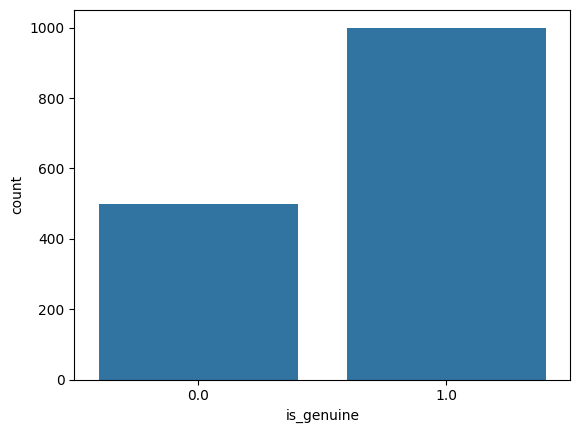

In [12]:
sns.countplot(data=df, x='is_genuine')

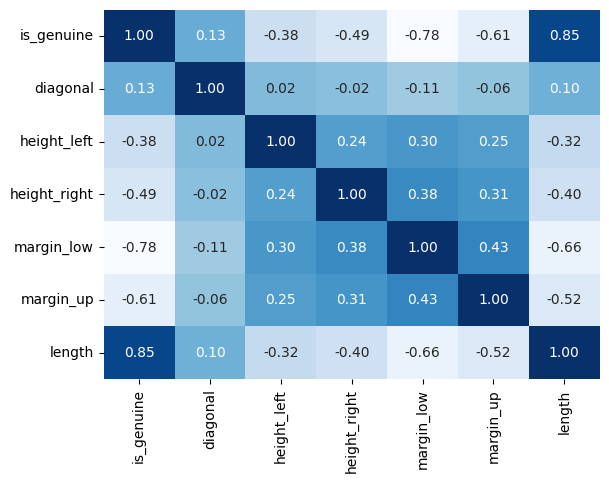

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, cmap='Blues');

- sns.heatmap: Seaborn 라이브러리에서 히트맵을 그리는 함수이다.

- corr: 상관 행렬 데이터

- annot=True: True로 설정하면 히트맵의 각 셀에 상관 계수 값을 텍스트로 표시한다.

- fmt='.2f': 셀에 표시되는 숫자의 형식을 지정합니다. (소수점 둘째 자리)

- cbar=None: 컬러바(Colorbar)를 표시하지 않도록 설정한다.

- cmap='Blues': 히트맵의 색상 맵을 지정한다.

- ;: 주피터 노트북에서 ;를 붙이면 불필요한 텍스트 출력이 생략된다.

In [14]:
X = df.drop(columns = 'is_genuine')
y = df['is_genuine']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('1.Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('2.Classification Report')
print(classification_report(y_test, pred))
print("3.Accuracy:",accuracy_score(y_test, pred))

1.Confusion Matrix
[[156   5]
 [  2 287]]
2.Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       161
         1.0       0.98      0.99      0.99       289

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

3.Accuracy: 0.9844444444444445


K-최근접 이웃(K-Nearest Neighbors) 알고리즘을 사용하여 다양한 K값에 따른 모델의 오차율을 계산하고 이를 시각화한다.

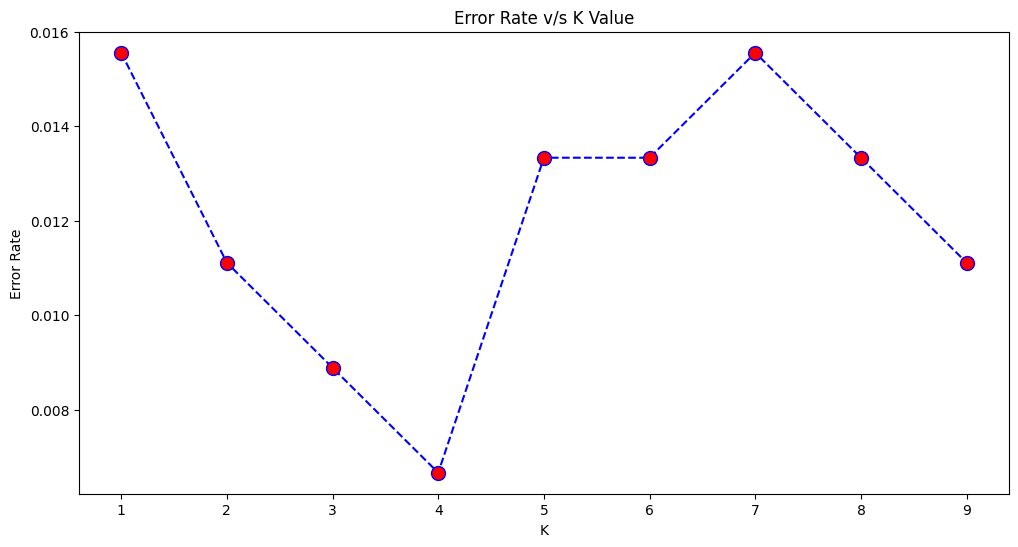

In [18]:
# 오차율 저장을 위한 리스트 초기화
error_rate = []
# K 값에 따른 KNN 모델 학습 및 예측
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # 실제값(y_test)과 예측값(pred_i)이 다른 비율(오차율)을 계산하여 error_rate 리스트에 추가한다.
    error_rate.append(np.mean(pred_i != y_test))

# # 오차율 저장을 위한 리스트 컴프리헨션
# error_rate = [
#     np.mean(KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train).predict(X_test) != y_test)
#     for i in range(1, 10)
# ]

plt.figure(figsize=(12,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')
plt.title('Error Rate v/s K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

시각화 그래프를 통해 K값이 증가함에 따라 오차율이 어떻게 변하는지를 직관적으로 확인할 수 있다. K=4일 때 오차율이 가장 낮다.

In [ ]:
# error_rate.append(np.mean(pred_i != y_test))

In [32]:
np.mean(pred_i != y_test) # 전체 데이터 수 중에 틀린 비율 true=1 더해서 전체수로 나누는 것.

0.011111111111111112

In [ ]:
### plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')

- plt.figure(figsize=(12, 6)): 그래프의 크기를 설정한다.

- range(1, 10): X축 값, 즉 K값의 범위을 의미한다.

- error_rate: Y축 값, 즉 각 K값에 대한 오차율 배열이다.

- color='blue': 선 색상을 파란색으로 설정한다.

- linestyle='dashed': 선 스타일을 점선으로 설정한다.

- marker='o': 데이터 포인트를 원형 마커로 표시한다.

- markerfacecolor='red': 마커 내부 색상을 빨간색으로 설정한다.

- markersize='10': 마커 크기를 10으로 설정한다.

K=4일 때, 정확도, 정밀도(실제), 재현율(모델)이 어떻게 변하는지 알아보자.

In [33]:
knn_4 = KNeighborsClassifier(n_neighbors = 4) # 1에서 4로
knn_4.fit(X_train, y_train)
pred = knn_4.predict(X_test)
 
print('WITH K = 4')
print('1.Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('2.Classification Report')
print(classification_report(y_test, pred))
print('3.Accuracy Score')
print(accuracy_score(y_test, pred))

WITH K = 4
1.Confusion Matrix
[[159   2]
 [  1 288]]
2.Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       161
         1.0       0.99      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

3.Accuracy Score
0.9933333333333333
